Алешко АС-21-05 Вариант 1

In [93]:
!pip install pandas
!pip install numpy

In [94]:
!pip install openpyxl
!pip install matplotlib
!pip install scipy

In [95]:
!pip install seaborn

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from outliers import smirnov_grubbs as grubbs

In [97]:
def series(nums):

    med = np.median(nums)
    nums = nums[nums != med]
    size = len(nums)

    sign = nums > med  # True is +; False is -

    nps, nms = 0, 0
    previous_s = sign[0]

    for s in sign[1:]:

        if s != previous_s and previous_s:
            nms += 1
        elif s != previous_s and not previous_s:
            nps += 1
        previous_s = s


    r = nms + nps
    n_m = sum(1 for s in sign if not s)
    n_p = sum(1 for s in sign if s)

    mu = 2*n_p*n_m / size + 1
    sigma_sq = 2*n_p*n_m*(2*n_p*n_m - size) / ((size**2)*(size - 1))
    sigma = sigma_sq**0.5

    return (r - mu) / sigma

In [98]:
def get_info(df):
    columns = ['count', 'unique', 'mean', 'median',  'range',  'std', 'varience', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt', 'st err', 'sum']
    info = df.describe().T
    info['median'] = df.median()
    info['unique'] = df.nunique()
    info['range'] = df.max(0) - df.min(0)
    info['varience'] = df.var()
    info['skew'] = df.skew()
    info['kurt'] = df.kurtosis()
    info['st err'] = df.sem()
    info['sum'] = df.sum()
    mode = df.mode(axis=0).T
    mode_names = [f'mode{i + 1}' for i in range(len(mode.T))]
    mode.columns = [f'mode{i + 1}' for i in range(len(mode.T))]
    columns = columns + mode_names
    info = pd.concat([info, mode], axis=1)
    return info[columns]

In [99]:
#plt.style.available

In [100]:
plt.style.use('Solarize_Light2')

In [101]:
data = pd.read_excel('data1.xlsx', sheet_name = '1')
data

,first,second,third,fourth,fifth,sixth,seventh
0,1.478837,3.524742,10.688410,8.762075,-0.639073,7,5
1,1.001225,0.704558,13.948562,8.406540,1.338411,4,7
2,12.442777,9.485070,11.323363,6.717878,11.860927,3,3
3,7.258455,4.063322,6.812343,9.374129,4.627152,4,12
4,2.847905,2.474827,13.001960,6.004247,3.497351,7,9
...,...,...,...,...,...,...,...
495,12.652488,5.980685,11.551907,15.599527,0.413245,3,16
496,3.017953,5.027926,1.647249,6.883272,16.401325,3,12
497,15.229314,7.827465,6.470981,4.492946,5.352318,3,12
498,7.899367,1.921087,10.150870,6.701511,7.854305,4,8


In [102]:
get_info(data).T

,first,second,third,fourth,fifth,sixth,seventh
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,498.000000,496.000000,496.000000,492.000000,497.000000,13.000000,15.000000
mean,4.995870,5.754075,7.129688,6.778237,7.204123,4.978000,9.980000
median,4.997589,5.598913,6.793201,6.844562,7.580795,5.000000,10.000000
range,42.512183,28.613249,36.525307,18.144419,21.626490,12.000000,14.000000
std,7.127216,5.007535,5.062651,3.052341,6.343499,2.233269,2.419775
varience,50.797213,25.075406,25.630440,9.316785,40.239980,4.987491,5.855311
min,-13.871724,-6.764758,-11.707942,-2.544892,-3.960927,0.000000,3.000000
25%,0.222956,2.196860,3.823782,4.669620,2.123675,3.000000,8.000000
50%,4.997589,5.598913,6.793201,6.844562,7.580795,5.000000,10.000000


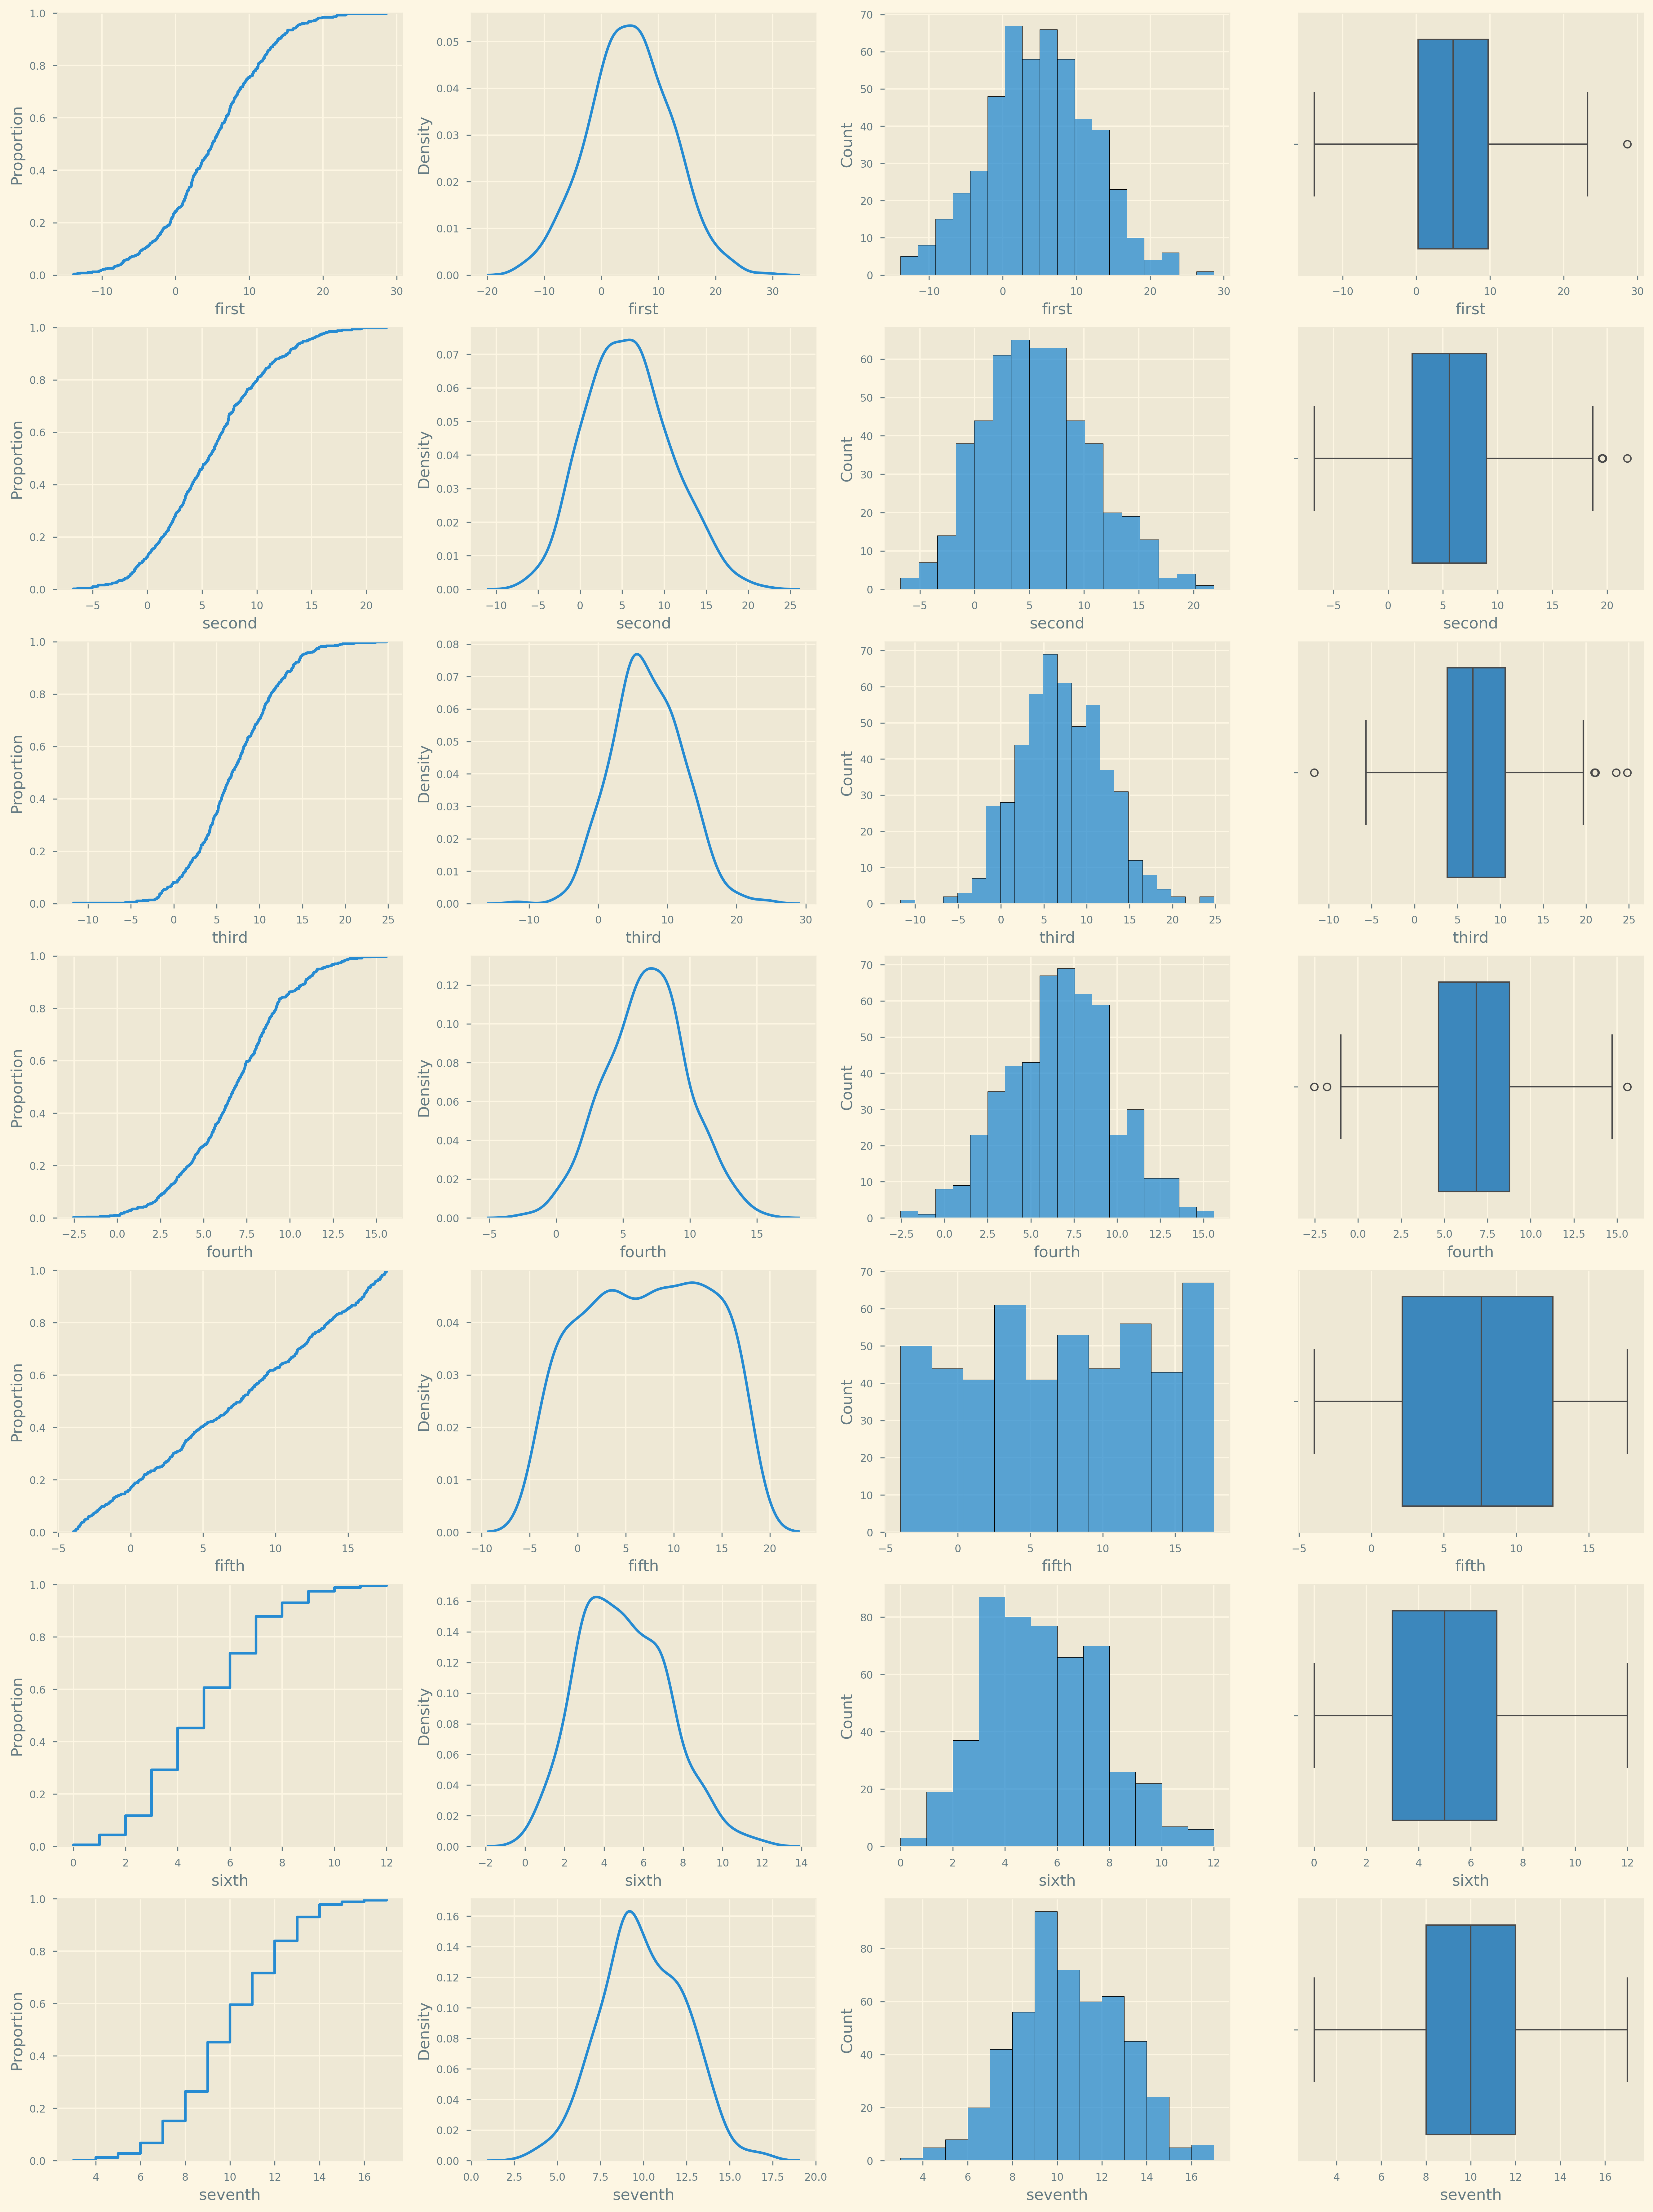

In [103]:
fig, axs = plt.subplots(7, 4, sharex=False,
                            figsize=(22, 30), dpi=300)

for var, ax in zip(data.head(0), axs):
    sns.ecdfplot(data=data, x=var, ax=ax[0])
    sns.kdeplot(data=data, x=var, ax=ax[1])
    sns.histplot(data=data, x=var, ax=ax[2])
    sns.boxplot(data=data, x=var, ax=ax[3])

1, 2, 3, 4 - нормальные распределения (Среднее ~ медиана; Эксцесс и ассиметрия ~ 0; На гистограмме вид нормального распределения)

5 - равномерное расределение (Эксцесс ~ 1,2 ассиметрия ~ 0; Мат ожидание ~ (min+max)/2; Дисперсия ~ (max-min)^2 / 2)

6 - Пуассоновское распределение (мат. ожидание ~ дисперсии, дискретная выборка)

7 - Бинормальное (исключительно по гистограмме)

In [104]:
for name in data.head(0):
    all_values = data[name].values
    non_outliers = grubbs.test(all_values, alpha=.05)
    print(name)
    print('series method |z| < 2.8')
    print('series method', series(all_values))
    print('outlier_values', set(all_values) - set(non_outliers))
    print()

first
series method |z| < 2.8
series method 0.0
outlier_values set()

second
series method |z| < 2.8
series method -16.384443106301003
outlier_values set()

third
series method |z| < 2.8
series method 0.17906495198143174
outlier_values set()

fourth
series method |z| < 2.8
series method 1.2534546638700221
outlier_values set()

fifth
series method |z| < 2.8
series method -0.5371948559442953
outlier_values set()

sixth
series method |z| < 2.8
series method -0.7342252257589859
outlier_values set()

seventh
series method |z| < 2.8
series method -0.6143177924688185
outlier_values set()



In [105]:
new_data = grubbs.test(data['third'].values, alpha=0.05)
new_data = pd.DataFrame(new_data, columns = ['third'])
type(new_data)
get_info(new_data).T

,third
count,500.000000
unique,496.000000
mean,7.129688
median,6.793201
range,36.525307
std,5.062651
varience,25.630440
min,-11.707942
25%,3.823782
50%,6.793201


<Axes: ylabel='Proportion'>

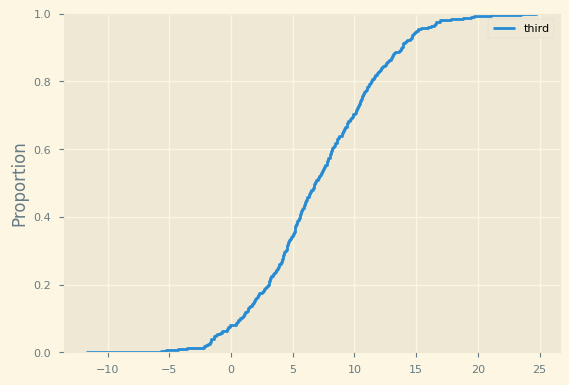

In [106]:
sns.ecdfplot(data=new_data)

<Axes: ylabel='Density'>

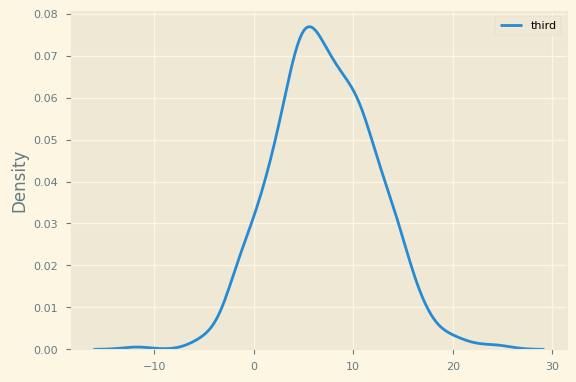

In [107]:
sns.kdeplot(data=new_data)


<Axes: ylabel='Count'>

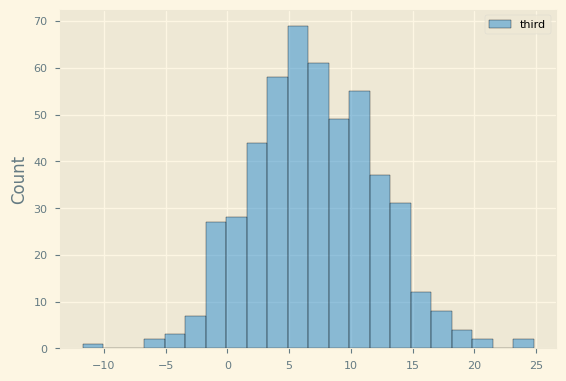

In [108]:
sns.histplot(data=new_data)


<Axes: >

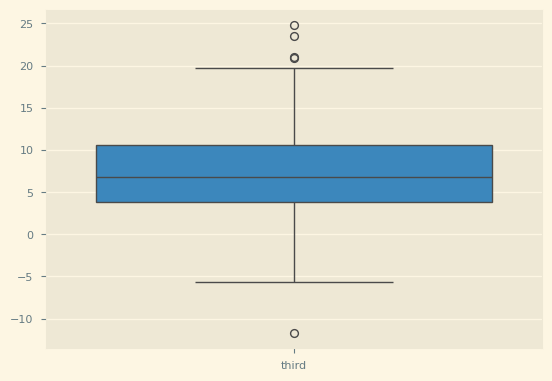

In [109]:
sns.boxplot(data=new_data)